c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


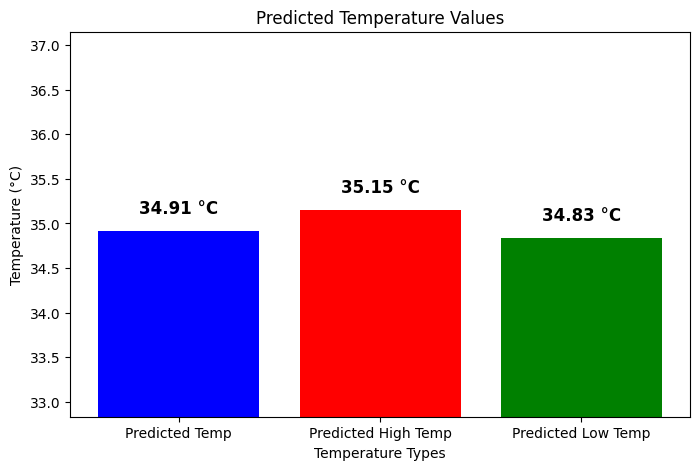

In [1]:
import tkinter as tk
from tkinter import messagebox, ttk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# Load trained models
rf_model = joblib.load('random_forest_model.pkl')
dl_model = joblib.load('decision_tree_model.pkl')
lr_model = joblib.load('linear_regression_model.pkl')
gnb_model = joblib.load('gaussian_process_model.pkl')
mlp_model = joblib.load('mlp_model.pkl')

# Creating Tkinter GUI
root = tk.Tk()
root.title("Weather Prediction App")
root.geometry("400x550")

tk.Label(root, text="Enter Weather Parameters", font=("Arial", 12, "bold")).pack()

entry_labels = ["AQI", "PM1 (µg/m³)", "PM2.5 (µg/m³)", "PM10 (µg/m³)", "Humidity (%)", "Dew Point (°C)", "Wet Bulb (°C)", "Heat Index (°C)"]
entries = []
for label in entry_labels:
    tk.Label(root, text=label).pack()
    entry = tk.Entry(root)
    entry.pack()
    entries.append(entry)

tk.Label(root, text="Select Model", font=("Arial", 12, "bold")).pack()
model_options = [
    "Random Forest + Linear Regression",
    "Decision Tree + Linear Regression",
    "Random Forest + MLP Classifier",
    "Gaussian Naïve + MLP Classifier"
]
model_var = tk.StringVar()
model_dropdown = ttk.Combobox(root, textvariable=model_var, values=model_options, state="readonly")
model_dropdown.pack()
model_dropdown.current(0)

def predict_temperature():
    try:
        # Extract and validate input
        new_data = []
        for entry in entries:
            value = entry.get().strip()  # Trim whitespace
            if value == "":
                raise ValueError("One or more fields are empty. Please enter all values.")
            new_data.append(float(value))  # Convert to float
        
        new_data = np.array([new_data])  # Reshape for model input
        selected_model = model_var.get()

        # Model selection and prediction
        if selected_model == "Random Forest + Linear Regression":
            rf_pred = rf_model.predict(new_data)
            lr_pred = lr_model.predict(new_data)
            predicted_temp = (rf_pred + lr_pred) / 2
        elif selected_model == "Decision Tree + Linear Regression":
            dt_pred = dl_model.predict(new_data)
            lr_pred = lr_model.predict(new_data)
            predicted_temp = (dt_pred + lr_pred) / 2
        elif selected_model == "Random Forest + MLP Classifier":
            rf_pred = rf_model.predict(new_data)
            mlp_pred = mlp_model.predict(new_data)
            predicted_temp = (rf_pred + mlp_pred) / 2
        elif selected_model == "Gaussian Naïve + MLP Classifier":
            gnb_pred = gnb_model.predict(new_data)
            mlp_pred = mlp_model.predict(new_data)
            predicted_temp = (gnb_pred + mlp_pred) / 2
        else:
            messagebox.showerror("Model Error", "Invalid model selection.")
            return

        # Display prediction results
        pred_temp, pred_high, pred_low = predicted_temp[0]
        result_label.config(text=f"Predicted Temp: {pred_temp:.2f} °C\n"
                                 f"Predicted High Temp: {pred_high:.2f} °C\n"
                                 f"Predicted Low Temp: {pred_low:.2f} °C")
        show_graph(pred_temp, pred_high, pred_low)

    except ValueError as e:
        messagebox.showerror("Input Error", f"Invalid input: {e}")

        pred_temp, pred_high, pred_low = predicted_temp[0]
        result_label.config(text=f"Predicted Temp: {pred_temp:.2f} °C\n"
                                  f"Predicted High Temp: {pred_high:.2f} °C\n"
                                  f"Predicted Low Temp: {pred_low:.2f} °C")
        show_graph(pred_temp, pred_high, pred_low)
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numerical values.")

def show_graph(pred_temp, pred_high, pred_low):
    labels = ['Predicted Temp', 'Predicted High Temp', 'Predicted Low Temp']
    values = [pred_temp, pred_high, pred_low]
    plt.figure(figsize=(8, 5))
    plt.bar(labels, values, color=['blue', 'red', 'green'])
    plt.xlabel("Temperature Types")
    plt.ylabel("Temperature (°C)")
    plt.title("Predicted Temperature Values")
    plt.ylim(min(values) - 2, max(values) + 2)
    for i, v in enumerate(values):
        plt.text(i, v + 0.2, f"{v:.2f} °C", ha='center', fontsize=12, fontweight='bold')
    plt.show()

tk.Button(root, text="Predict Temperature", command=predict_temperature).pack()
result_label = tk.Label(root, text="", font=("Arial", 12))
result_label.pack()

root.mainloop()
